In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from keras.datasets import boston_housing
from keras import layers, models, optimizers 

In [2]:
#Cargando los datos
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [3]:
train_data.shape

(404, 13)

In [5]:
train_labels.shape

(404,)

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
train_labels[0]

15.2

Normalización de los datos

In [10]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std

test_data = (test_data - mean) / std

Para el conjunto de test, uso la media `mean` y la desviación `std` del conjunto de <strong>train</strong>. Esto debido a que en relidad debería usar siempre mis datos de entrenamiento para correr los modelos.

In [9]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [11]:
test_data[0]

array([ 1.80846000e+01, -1.09923072e-17,  1.81000000e+01,  1.26686340e-16,
        6.79000000e-01,  6.43400000e+00,  1.00000000e+02,  1.83470000e+00,
        2.40000000e+01,  6.66000000e+02,  2.02000000e+01,  2.72500000e+01,
        2.90500000e+01])

Construcción del modelo

In [47]:
def build_model_regresion(lr_val, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # No requiere una capa de activación ya que el resultado esperado es un valor continuo.
    model.compile(optimizer = optimizers.RMSprop(lr=lr_val),loss='mse', metrics=['mae'])
    return model

In [48]:
# k-Fold validation

k = 4
num_val_samples = len(train_data) // k
num_epoch = 110
all_history = []

In [49]:
for i in range(k):
    print('Flod: ', i)
    #Conjuntos de validación 
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_labels[i*num_val_samples: (i+1)*num_val_samples]

    # Conjuntos de entrenamiento 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]
         ], axis=0
    )
    partial_train_targets = np.concatenate(
        [train_labels[:i*num_val_samples],
         train_labels[(i+1)*num_val_samples:]
         ], axis=0
    )

    # Construccion del modelo 
    model = build_model_regresion(0.001, 13)
    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epoch,
                        batch_size=16,
                        validation_data=(val_data, val_targets),
                        verbose=0)
    

    # Guardando los resultados de cada itereación
    all_history.append(history.history['val_mae'])


Flod:  0


Flod:  1


Flod:  2


Flod:  3


In [50]:
all_history

[[19.619308471679688,
  16.899673461914062,
  13.412263870239258,
  9.479701042175293,
  6.016280174255371,
  4.584997177124023,
  3.9249632358551025,
  3.4981305599212646,
  3.400151014328003,
  3.348133087158203,
  3.1127536296844482,
  3.024717092514038,
  2.9444916248321533,
  2.8708062171936035,
  2.848093271255493,
  2.792482614517212,
  2.6256935596466064,
  2.6780290603637695,
  2.5929901599884033,
  2.4187731742858887,
  2.3836607933044434,
  2.40797758102417,
  2.3336031436920166,
  2.315272808074951,
  2.275885820388794,
  2.269810914993286,
  2.2328073978424072,
  2.1997673511505127,
  2.2031261920928955,
  2.1950533390045166,
  2.0770821571350098,
  2.105848789215088,
  2.138028383255005,
  2.269899845123291,
  2.069345235824585,
  2.0958104133605957,
  2.130866765975952,
  2.0577549934387207,
  2.054502487182617,
  2.1157829761505127,
  2.0986275672912598,
  2.058337688446045,
  2.0555408000946045,
  2.0023579597473145,
  2.094449281692505,
  2.054616689682007,
  1.970525

In [51]:
len(all_history[0])

110

In [52]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [53]:
all_mae_avg

0      19.630101
1      16.414412
2      12.444112
3       8.629771
4       6.112586
         ...    
105     2.405969
106     2.452848
107     2.407567
108     2.386718
109     2.381758
Length: 110, dtype: float64

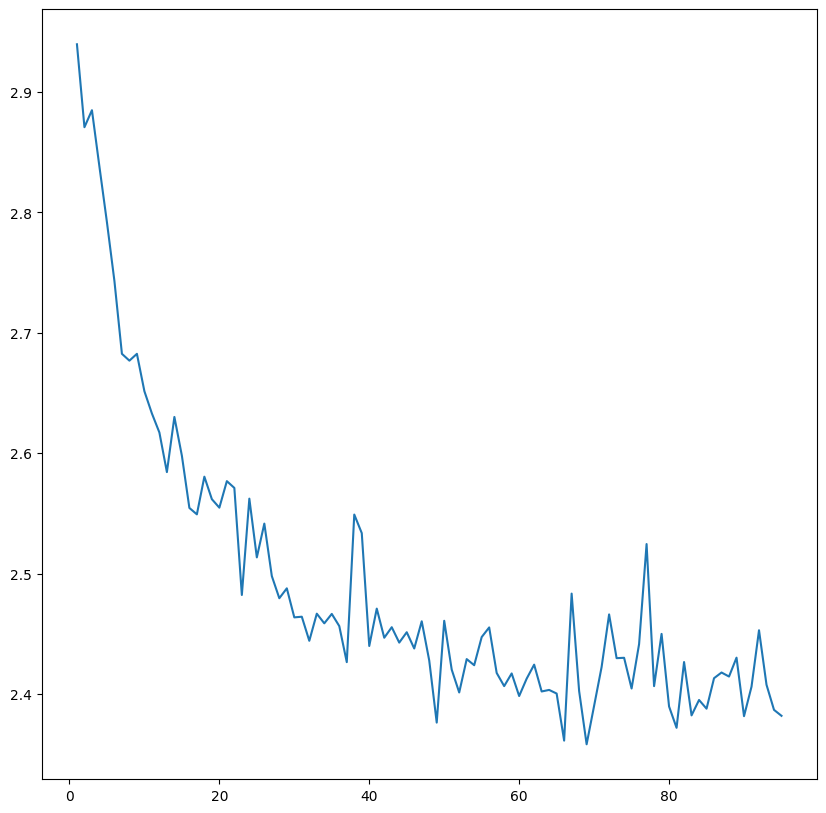

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [55]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 10402411.0000 - mae: 3133.0217


[10402411.0, 3133.021728515625]